# Sravya Somala (c0907007)

# Load and Explore the Fashion MNIST Dataset

In [ ]:
# import necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Data exploration
print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])
print("Shape of each image:", x_train.shape[1:])

Number of training samples: 60000
Number of testing samples: 10000
Shape of each image: (28, 28)


In [ ]:
# Display the shape of the data to understand its structure
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
# Display unique labels in the training set
unique_labels = np.unique(y_train)
print(f'Unique labels in training set: {unique_labels}')



Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]


# Visualizations

### Display Sample Images

Display one sample image for each unique label to get a sense of the dataset.

In [ ]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


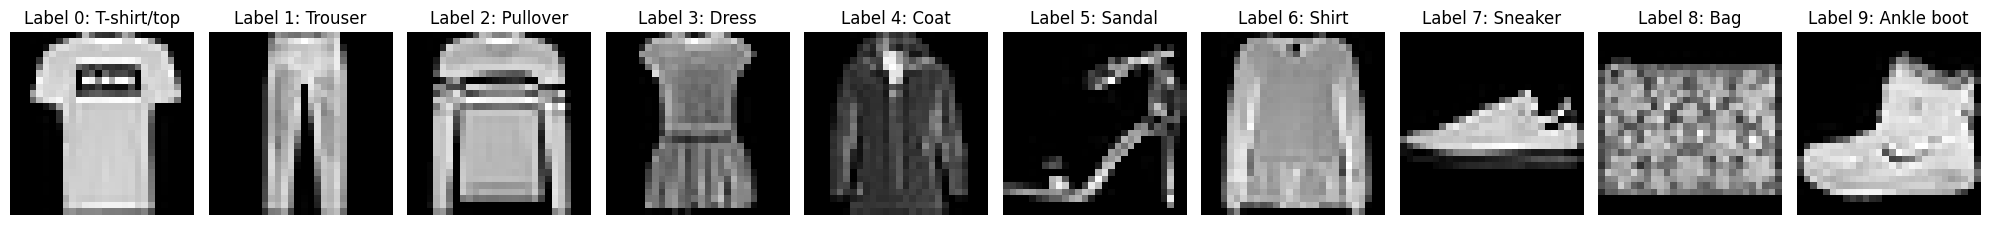

In [ ]:
# Find the index of the first occurrence of each unique label
sample_indices = [np.where(y_train == label)[0][0] for label in unique_labels]

# Display one sample image for each unique label
plt.figure(figsize=(20, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'Label {y_train[idx]}: {class_names[y_train[idx]]}') #plt.title(f'Label: {y_train[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Class Distribution
Plot the distribution of samples across different classes to understand the class balance.


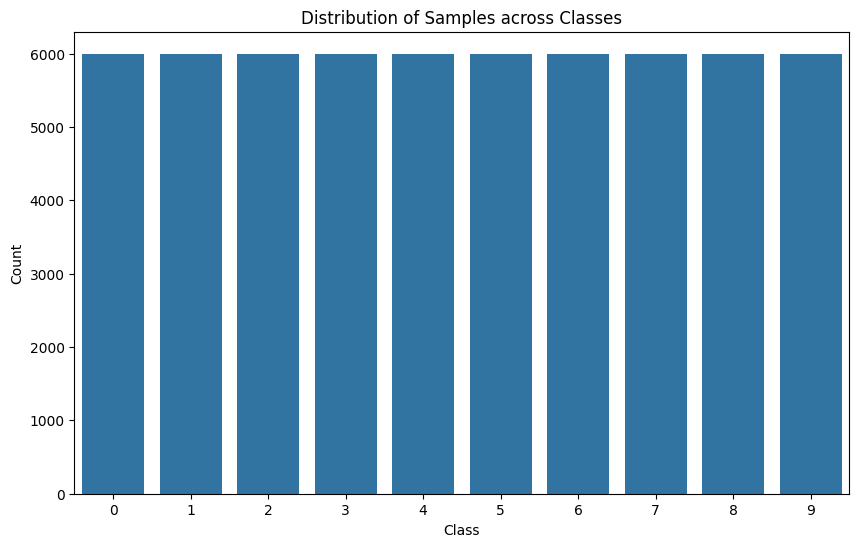

In [ ]:
# plot the distribution of samples across different classes
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Samples across Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Data Preprocessing

Preprocess the data by normalizing the pixel values to the range [0, 1] and reshaping the data to fit the model's input requirements.
Also, one-hot encode the labels.


In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize the pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to fit the model's input requirements
# Model expects input shape of (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build an Artificial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Build the ANN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Display the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Compile the Model

Compile the model with the Adam optimizer and categorical crossentropy loss function.
Adam is chosen for its adaptive learning rate properties, and categorical crossentropy is suitable for multi-class classification.


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

Train the model on the training data with a validation split to monitor performance on the validation set.


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2)


Epoch 1/10
1500/1500 - 16s - loss: 0.6017 - accuracy: 0.7794 - val_loss: 0.3656 - val_accuracy: 0.8655 - 16s/epoch - 11ms/step
Epoch 2/10
1500/1500 - 5s - loss: 0.3996 - accuracy: 0.8566 - val_loss: 0.3150 - val_accuracy: 0.8834 - 5s/epoch - 4ms/step
Epoch 3/10
1500/1500 - 6s - loss: 0.3454 - accuracy: 0.8756 - val_loss: 0.2917 - val_accuracy: 0.8918 - 6s/epoch - 4ms/step
Epoch 4/10
1500/1500 - 5s - loss: 0.3141 - accuracy: 0.8858 - val_loss: 0.2795 - val_accuracy: 0.8958 - 5s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 6s - loss: 0.2858 - accuracy: 0.8948 - val_loss: 0.2672 - val_accuracy: 0.8978 - 6s/epoch - 4ms/step
Epoch 6/10
1500/1500 - 5s - loss: 0.2657 - accuracy: 0.9025 - val_loss: 0.2594 - val_accuracy: 0.9030 - 5s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 6s - loss: 0.2475 - accuracy: 0.9098 - val_loss: 0.2512 - val_accuracy: 0.9073 - 6s/epoch - 4ms/step
Epoch 8/10
1500/1500 - 5s - loss: 0.2341 - accuracy: 0.9139 - val_loss: 0.2458 - val_accuracy: 0.9084 - 5s/epoch - 3ms/step
Epoch

# Evaluate the Model

313/313 - 1s - loss: 0.2707 - accuracy: 0.9081 - 857ms/epoch - 3ms/step
Test accuracy: 0.9081


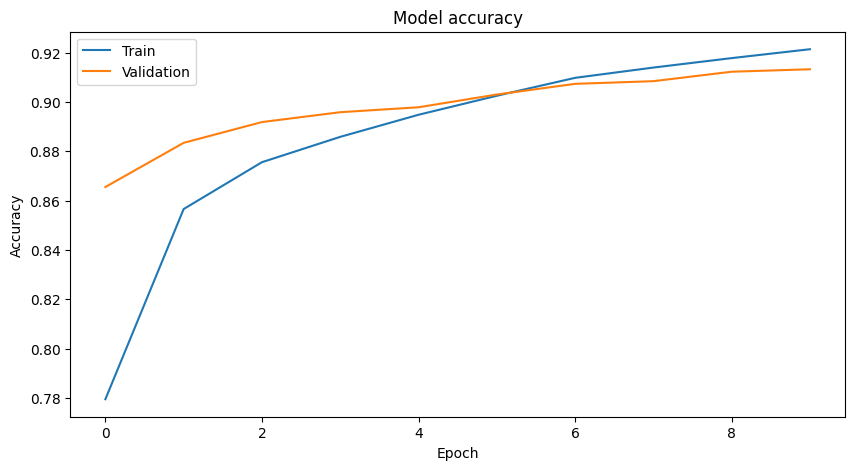

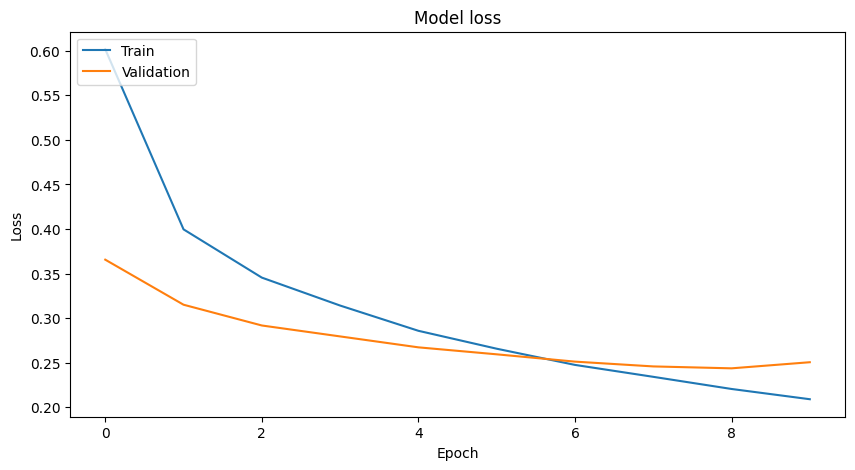

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Test Set Prediction

313/313 [==============================] - 1s 2ms/step


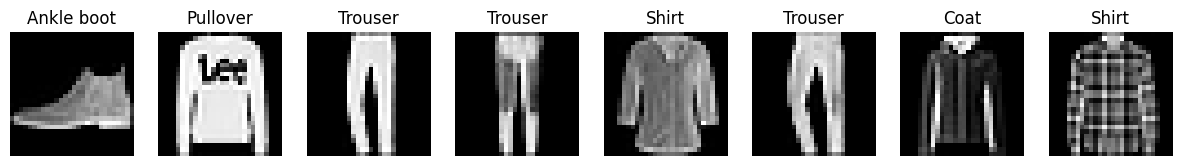

In [ ]:
# Predict on the test set
predictions = model.predict(x_test)

# Display a few sample predictions
num_samples = 8
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()


313/313 [==============================] - 1s 2ms/step


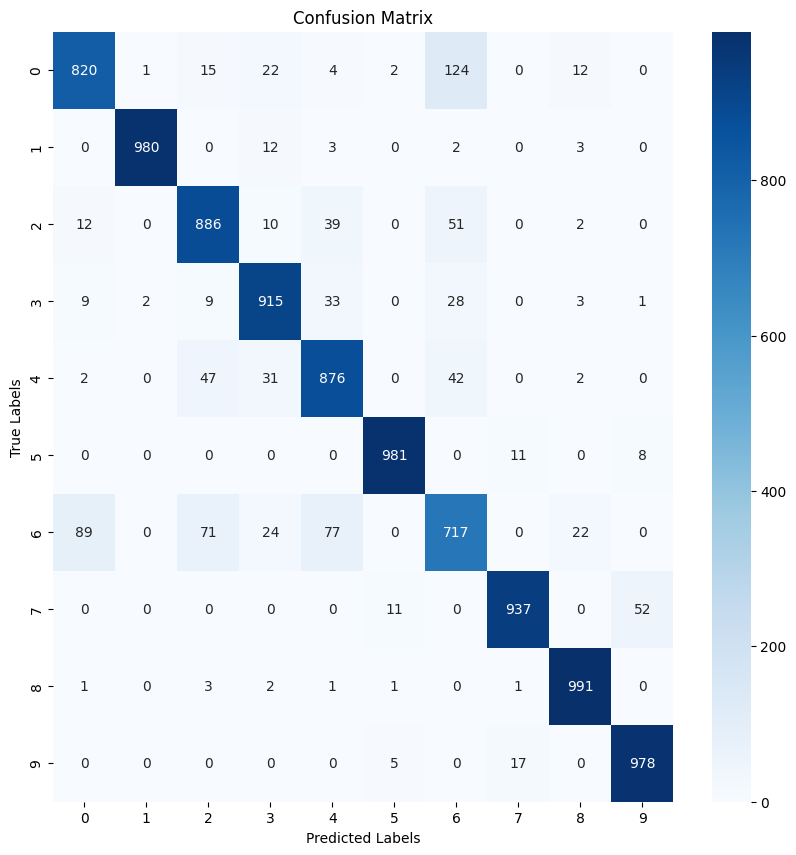

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.89      0.87      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.88      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.72      0.73      1000
           7       0.97      0.94      0.95      1000
           8       0.96      0.99      0.97      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# Predict on the test set and display a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report


predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


# Classification report
print(classification_report(true_classes, predicted_classes)) # Changed true_classes to y_test

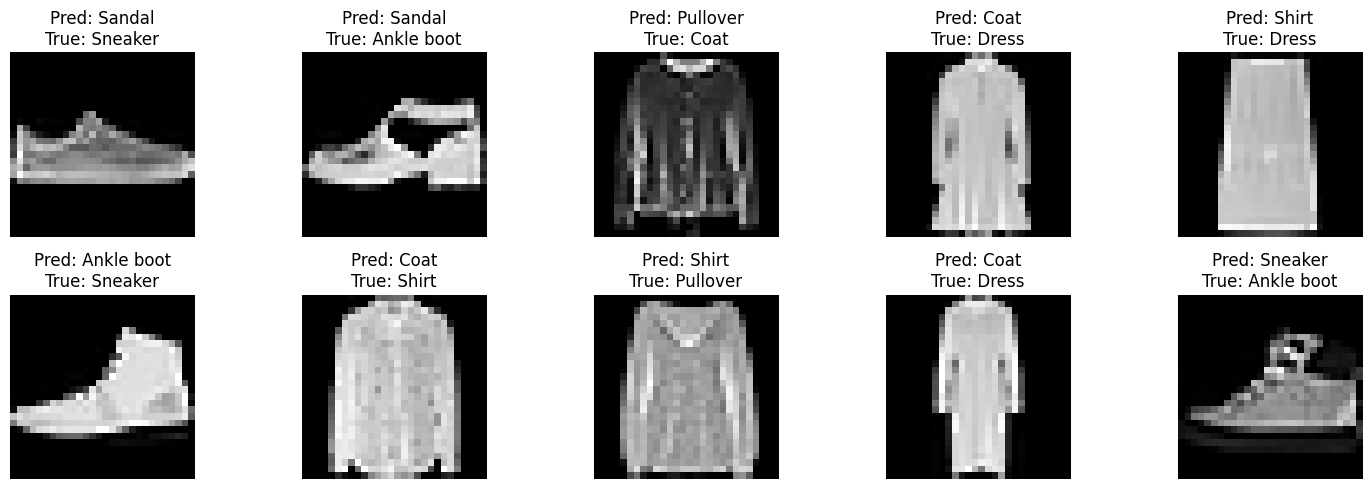

In [ ]:
# Display misclassified images
misclassified_indices = np.where(predicted_classes != true_classes)[0]
plt.figure(figsize=(15, 5))
for i, mis_idx in enumerate(misclassified_indices[:10]):  # Display first 10 misclassified images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[mis_idx].reshape(28, 28), cmap='gray') # Changed X_test to x_test
    predicted_label = class_names[predicted_classes[mis_idx]]
    true_label = class_names[true_classes[mis_idx]]
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Data Augmentation
Use data augmentation to improve the model's generalization. This is done using Keras' ImageDataGenerator.


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2 # Move validation_split to ImageDataGenerator
)

# Fit the data generator to training data
datagen.fit(x_train)

# Train the model using data augmentation
# Remove validation_split from model.fit
history = model.fit(datagen.flow(x_train, y_train, batch_size=32, subset='training'),
                    epochs=20,
                    validation_data=datagen.flow(x_train, y_train, batch_size=32, subset='validation')) # Changed x_train to x_train

Epoch 1/20
1500/1500 [==============================] - 24s 15ms/step - loss: 0.5476 - accuracy: 0.8022 - val_loss: 0.3879 - val_accuracy: 0.8519
Epoch 2/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4548 - accuracy: 0.8334 - val_loss: 0.3735 - val_accuracy: 0.8587
Epoch 3/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4275 - accuracy: 0.8436 - val_loss: 0.3469 - val_accuracy: 0.8734
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.4130 - accuracy: 0.8504 - val_loss: 0.3534 - val_accuracy: 0.8637
Epoch 5/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.4020 - accuracy: 0.8528 - val_loss: 0.3223 - val_accuracy: 0.8805
Epoch 6/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3875 - accuracy: 0.8598 - val_loss: 0.3319 - val_accuracy: 0.8787
Epoch 7/20
1500/1500 [==============================] - 23s 16ms/step - loss: 0.3804 - accuracy: 0.8606 - val_loss: 0.3129 -

# Hyperparameter Tuning

Experiment with different architectures, activation functions, optimizers, and batch sizes to find the best model configuration.


In [ ]:
# Function to experiment with different layer configurations
def test_different_layers(layers_config):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    for filters in layers_config:
        model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
## Experiment 1: Layer Variations

model_varied_layers = test_different_layers([64, 128])
history_varied_layers = model_varied_layers.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)  # Train the model with different layer sizes

print(model_varied_layers.summary())  # Print the model summary

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.6102 - accuracy: 0.7780 - val_loss: 0.4245 - val_accuracy: 0.8450
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4007 - accuracy: 0.8539 - val_loss: 0.3598 - val_accuracy: 0.8673
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3408 - accuracy: 0.8738 - val_loss: 0.3391 - val_accuracy: 0.8743
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3025 - accuracy: 0.8878 - val_loss: 0.3221 - val_accuracy: 0.8777
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2733 - accuracy: 0.8987 - val_loss: 0.3154 - val_accuracy: 0.8832
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 

In [ ]:
## Experiment 2: Activation Functions
model_sigmoid = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='sigmoid'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)  # Train the model with different activation functions

print(model_sigmoid.summary())  # Print the model summary


Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 1.9987 - accuracy: 0.2601 - val_loss: 1.3018 - val_accuracy: 0.5702
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0481 - accuracy: 0.6187 - val_loss: 0.9004 - val_accuracy: 0.6483
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8314 - accuracy: 0.6718 - val_loss: 0.7931 - val_accuracy: 0.6994
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7326 - accuracy: 0.7213 - val_loss: 0.7178 - val_accuracy: 0.7334
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6615 - accuracy: 0.7462 - val_loss: 0.6340 - val_accuracy: 0.7607
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 

In [ ]:
## Experiment 3: Optimizer and Learning Rate
model_rmsprop = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_rmsprop.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)    # Train the model with different optimizer and learning rate

print(model_rmsprop.summary())  # Print the model summary

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4197 - accuracy: 0.8522 - val_loss: 0.3026 - val_accuracy: 0.8906
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2755 - accuracy: 0.9025 - val_loss: 0.2816 - val_accuracy: 0.9007
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2336 - accuracy: 0.9153 - val_loss: 0.2755 - val_accuracy: 0.9004
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2035 - accuracy: 0.9261 - val_loss: 0.2549 - val_accuracy: 0.9086
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1830 - accuracy: 0.9346 - val_loss: 0.2643 - val_accuracy: 0.9075
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 

In [ ]:
## Experiment 4: Batch Size and Epochs
model_large_batch = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_large_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_large_batch = model_large_batch.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)  # Train the model with a larger batch size

print(model_large_batch.summary())  # Print the model summary

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.4306 - accuracy: 0.8494 - val_loss: 0.3302 - val_accuracy: 0.8836
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2892 - accuracy: 0.8972 - val_loss: 0.2949 - val_accuracy: 0.8932
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2449 - accuracy: 0.9123 - val_loss: 0.2678 - val_accuracy: 0.9029
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2148 - accuracy: 0.9218 - val_loss: 0.2576 - val_accuracy: 0.9053
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1876 - accuracy: 0.9315 - val_loss: 0.2405 - val_accuracy: 0.9106
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1637 - accuracy: 0.9410 - val_loss: 0.2447 - val_accuracy: 0.9113
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1446 - accuracy: 0.9480 - val_loss: 0.2456 - val_accuracy: 0.9150
Epoch 

# Model Comparison
Summarize and compare the performance of different models in a table for easy reference.


Performance of Varied Layers Model:
313/313 - 1s - loss: 0.3299 - accuracy: 0.8778 - 873ms/epoch - 3ms/step
Test accuracy: 0.8778, Test loss: 0.3299


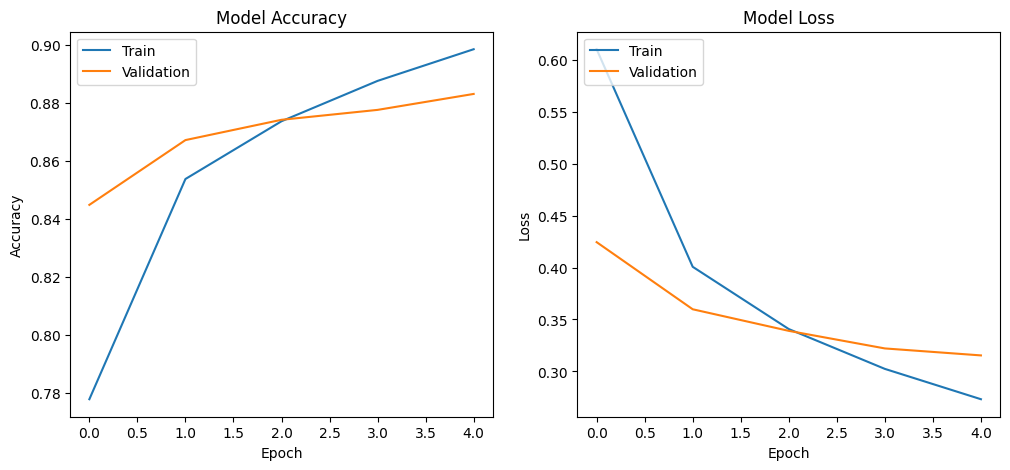

Performance of Sigmoid Activation Model:
313/313 - 1s - loss: 0.6421 - accuracy: 0.7525 - 1s/epoch - 4ms/step
Test accuracy: 0.7525, Test loss: 0.6421


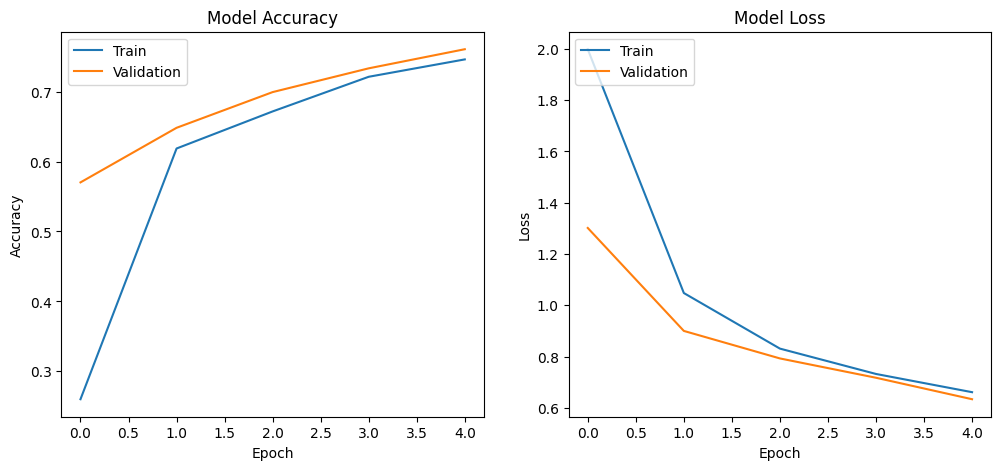

Performance of RMSprop Optimizer Model:
313/313 - 1s - loss: 0.2814 - accuracy: 0.9052 - 709ms/epoch - 2ms/step
Test accuracy: 0.9052, Test loss: 0.2814


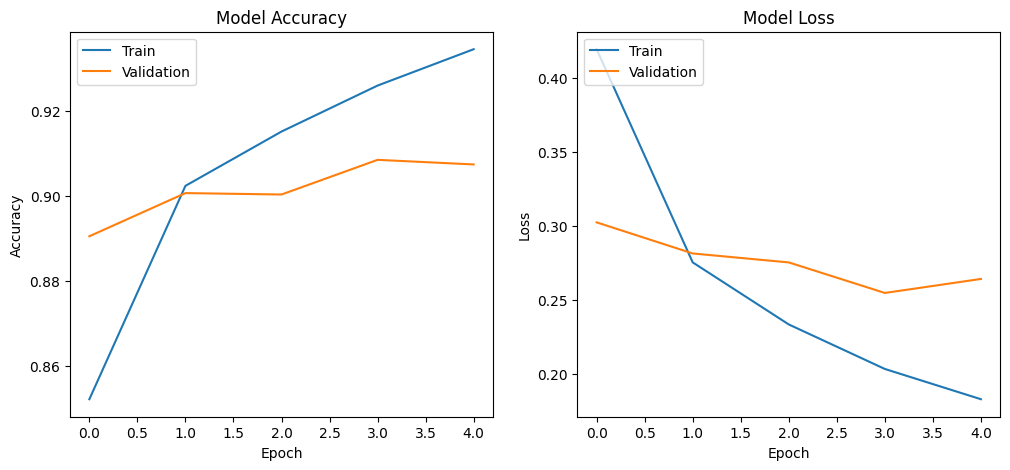

Performance of Large Batch Size Model:
313/313 - 1s - loss: 0.4517 - accuracy: 0.9088 - 612ms/epoch - 2ms/step
Test accuracy: 0.9088, Test loss: 0.4517


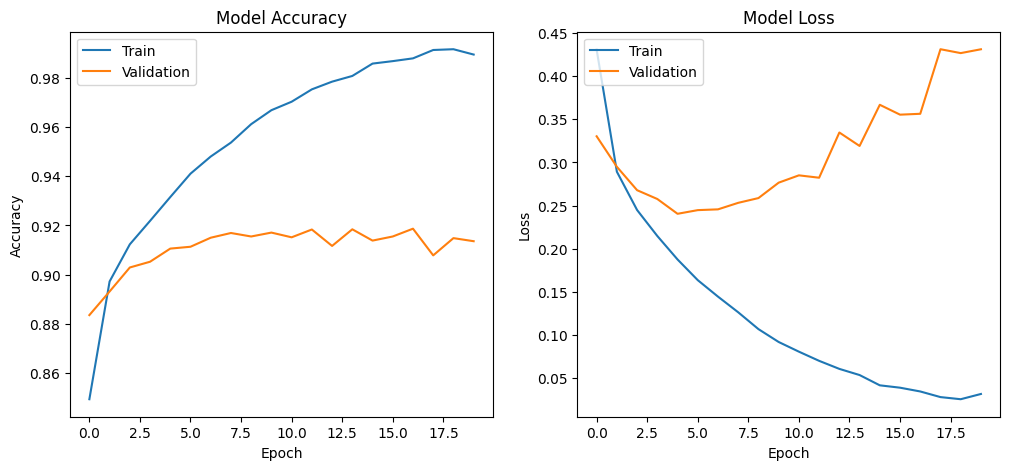

In [ ]:
# Evaluate and visualize performance for each experiment

# Define a helper function to evaluate and plot metrics
def evaluate_and_plot(model, history):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Evaluate and visualize results from varied layers model
print("Performance of Varied Layers Model:")
evaluate_and_plot(model_varied_layers, history_varied_layers)

# Evaluate and visualize results from sigmoid activation model
print("Performance of Sigmoid Activation Model:")
evaluate_and_plot(model_sigmoid, history_sigmoid)

# Evaluate and visualize results from RMSprop optimizer model
print("Performance of RMSprop Optimizer Model:")
evaluate_and_plot(model_rmsprop, history_rmsprop)

# Evaluate and visualize results from large batch size model
print("Performance of Large Batch Size Model:")
evaluate_and_plot(model_large_batch, history_large_batch)
